# Introduction to NLP for Beginners

This notebook provides a step-by-step introduction to Natural Language Processing (NLP) concepts and workflows. It covers data preprocessing, feature extraction, model training, and evaluation using Python libraries such as `pandas`, `nltk`, and `sklearn`. Each step is explained with comments and code examples to help beginners understand the process.

## Table of Contents

* [Loading and Exploring the Dataset](#loading-and-exploring-the-dataset)
* [Text Preprocessing](#text-preprocessing)
* [Splitting the Dataset](#splitting-the-dataset)
* [Feature Extraction](#feature-extraction)
* [Training a Machine Learning Model](#training-a-machine-learning-model)
* [Model Evaluation](#model-evaluation)
* [Prediction Pipeline](#prediction-pipeline)

### Loading and Exploring the Dataset
The dataset is loaded using `pandas.read_csv()`. It contains text data and corresponding labels for sentiment analysis. We inspect the shape and preview the first few rows to understand the structure of the data.

Pandas is a powerful open-source Python library used for data manipulation and analysis. It provides two main data structures: Series (1-dimensional) and DataFrame (2-dimensional, like a table). Pandas is commonly used for:
- Reading and writing data from various file formats (CSV, Excel, SQL, etc.)
- Cleaning and preprocessing data
- Filtering, grouping, and aggregating data
- Handling missing values
- Merging and joining datasets
- Exploratory data analysis and visualization

It is widely used in data science, machine learning, and analytics workflows.

Additional reading/tutorial: https://pandas.pydata.org/docs/user_guide/10min.html


In [72]:
import pandas as pd

In [73]:
df = pd.read_csv(f"data/yelp_reviews.txt", sep="\t", header=None, names=["text", "label"])
print(df.shape)
df.head(2)

(1000, 2)


,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0


<Axes: title={'center': 'Label Distribution'}, xlabel='label'>

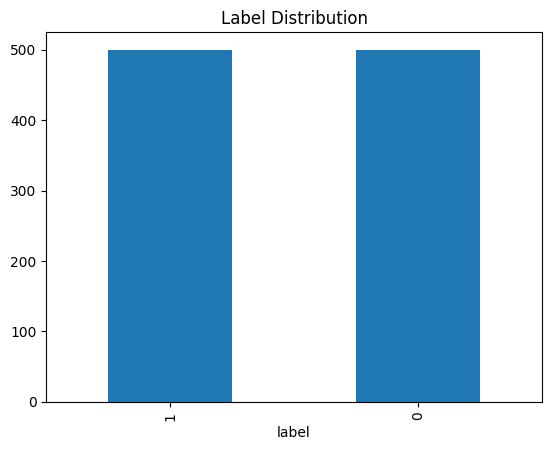

In [74]:
# Visualizing Label Distribution
# A bar plot is created to visualize the distribution of labels in the dataset. This helps us understand the balance of classes (positive vs. negative sentiment).

df.label.value_counts().plot(kind="bar", title="Label Distribution")

### Text Preprocessing
Text preprocessing is a crucial step in NLP. The preprocessing helps prepare the text data for feature extraction and training machine learning models.

Here, we use `nltk` to prepare the text for feature extraction:
- Tokenize the text into individual words.
- Remove stop words (common words like "the", "is", etc.).
- Apply stemming to reduce words to their root forms (e.g., "running" → "run").

NLTK (Natural Language Toolkit) is a popular Python library for working with human language data (text). It provides easy-to-use interfaces for text processing tasks such as tokenization, stemming, lemmatization, stop word removal, and more. 

Additional reading: https://www.analyticsvidhya.com/blog/2021/07/nltk-a-beginners-hands-on-guide-to-natural-language-processing/

In [75]:
# use nltk to tokenize and normalize the text, apply stemming or lemmatization if needed, stop words removal
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text.lower())
    # Optionally, you can apply stemming or lemmatization here
    tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]  # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]  # Remove punctuation
    # Optionally, you can remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    return tokens


In [76]:
df["tokens"] = df.text.apply(process_text)
print(df.shape)
df.head(2)

(1000, 3)


,text,label,tokens
0,Wow... Loved this place.,1,"[wow, love, thi, place]"
1,Crust is not good.,0,"[crust, good]"


### Splitting the Dataset

Splitting the dataset is a crucial step in building machine learning models. It means dividing your data into at least two parts: a **training set** and a **test set**.

- **Training set:** This is the portion of the data that the model learns from. The model uses this data to find patterns and relationships.
- **Test set:** This is a separate portion of the data that the model has never seen before. After training, we use the test set to check how well the model performs on new, unseen data.

**Why is splitting important?**

If we train and test the model on the same data, the model might just memorize the answers (overfitting) and not actually learn to generalize to new data. By splitting the data, we can see if the model is truly learning or just memorizing.

**Example:**
Imagine you are studying for an exam. If you only practice with the exact questions that will be on the test, you might do well, but you haven’t really learned the concepts. If you practice with one set of questions (training set) and then test yourself with different questions (test set), you’ll know if you truly understand the material.

Here, we use scikit-learn's (`sklearn`) `train_test_split` method to easily and efficiently split our dataset into training and test sets. This helps ensure our model is evaluated fairly and can generalize to new data.

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    df.tokens, df.label, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head(2), y_train.head(2)

(800,) (200,) (800,) (200,)


(29                    [worst, wa, salmon, sashimi]
 535    [excel, new, restaur, experienc, frenchman]
 Name: tokens, dtype: object,
 29     0
 535    1
 Name: label, dtype: int64)

### Feature Extraction

Feature extraction is the process of converting raw data (like text, images, or audio) into a set of measurable characteristics, called **features**, that a machine learning model can understand and use.

In the context of text data, feature extraction means turning words or sentences into numbers, because machine learning models work with numbers, not text. Each feature represents some aspect of the data that might help the model make predictions.

**Example (Text Data):**
Suppose you have the sentence:  
*"I love this product"*

A simple way to extract features is to count how many times each word appears in the sentence. For example:
- "I": 1
- "love": 1
- "this": 1
- "product": 1

This is called the **Bag of Words** approach.

**Why is feature extraction important?**  
Without feature extraction, the model cannot understand or learn from the data. Good features help the model find patterns and make accurate predictions.

**In our context:**  
We use `CountVectorizer` from scikit-learn (`sklearn`) to automatically convert our text data into numerical features. This process is called **vectorization**, where each unique word becomes a feature, and each text sample is represented as a vector


Additional reading: https://www.analyticsvidhya.com/blog/2022/01/nlp-tutorials-part-ii-feature-extraction

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
# Since we have already tokenized the text
# we can use a custom tokenizer that returns the tokens directly
def identity_tokenizer(x):
    return x
vectorizer = CountVectorizer(tokenizer=identity_tokenizer, lowercase=False)

# Fit the vectorizer on the training data
X = vectorizer.fit_transform(X_train)
# Convert the sparse matrix to a dense format if needed
X_dense = X.todense()
# Convert to DataFrame for easier handling
X_df = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())
print(X_df.shape)


(800, 1366)


/Users/ashishu007/Documents/side-projects/nlp-intro/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Another common feature extraction technique is `TF-IDF` (Term Frequency-Inverse Document Frequency) which is also provided in scikit-learn (`sklearn`) as `TfidfVectorizer`.

This method not only counts word occurrences but also reduces the weight of common words and increases the weight of rare but important words. It is often more effective than simple counts for many NLP tasks.


In [81]:
X_df.head(2)

,abov,absolut,absolutley,accid,accomod,accordingli,account,acknowledg,actual,ad,...,wrong,yay,yeah,year,yellow,yet,yucki,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Displaying the 30th row of the training data and its corresponding label
print(f"Processed text: {X_train.iloc[29]}\tSentiment: {y_train.iloc[29]}")
print(f"{X_df.iloc[29]['zero']} is the count of the word 'zero' in the 30th row of the training data.")


Processed text: ['zero', 'star', 'would', 'give', 'zero', 'star']	Sentiment: 0
2 is the count of the word 'zero' in the 30th row of the training data.


### Training a Machine Learning Model

Now that we have extracted numerical features from our text data, the next step is to train a machine learning (ML) model. Training a model means teaching it to recognize patterns in the data so it can make predictions on new, unseen examples.

In this tutorial, we use an **MLP (Multi-Layer Perceptron) classifier**, which is a type of neural network. The MLP learns from the feature vectors we created and tries to classify each review as either positive or negative sentiment.

**How it works:**
- The model looks at the features (numbers representing words) and the correct labels (positive or negative).
- It adjusts its internal parameters to minimize mistakes on the training data.
- After training, the model should be able to predict the sentiment of new reviews based on their features.

**Why this step is important:**  
Without training, the model would have no knowledge of the relationship between the words in a review and its sentiment. Training allows the model to learn these relationships so it can make accurate predictions.

In our code, we use scikit-learn's (`sklearn`) `MLPClassifier` to perform


Additional reading: https://www.ibm.com/think/topics/supervised-vs-unsupervised-learning


In [83]:
from sklearn.neural_network import MLPClassifier


In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_df, y_train)


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,42


**Supervised vs. Unsupervised Learning**

- **Supervised Learning:**  
  In supervised learning, the model is trained on a labeled dataset, which means each training example has both an input and a known output (label). The goal is for the model to learn the mapping from inputs to outputs so it can predict labels for new, unseen data.  
  *Examples:* Classification (spam detection, sentiment analysis), Regression (predicting house prices).

- **Unsupervised Learning:**  
  In unsupervised learning, the model is given data without explicit labels. The goal is to find patterns, groupings, or structure in the data.  
  *Examples:* Clustering (grouping customers by behavior), Dimensionality Reduction (PCA).

---

**Classification vs. Regression**

- **Classification:**  
  The task is to predict a discrete label or category (e.g., positive/negative sentiment, spam/ham, types of animals). The output is categorical.

- **Regression:**  
  The task is to predict a continuous value (e.g., price, temperature, age). The output is numerical.

---

**Why is this a Classification Problem?**

This problem is about predicting the sentiment of a review (positive or negative). The output is a discrete label (0 = negative, 1 = positive), not a continuous value. Therefore, it is a **classification** problem.

---

**Other ML Algorithms for Classification Problems**

- Logistic Regression
- Support Vector Machines (SVM)
- Decision Trees
- Random Forests
- k-Nearest Neighbors (k-NN)
- Naive Bayes
- Gradient Boosting Machines (e.g., XGBoost, LightGBM)
- Neural Networks (e.g., MLP, CNN, RNN for text)

---

**Further Reading:**
- [Supervised vs. Unsupervised Learning (IBM)](https://www.ibm.com/think/topics/supervised-vs-unsupervised-learning)
- [Classification vs. Regression (scikit-learn)](https://scikit-learn.org/stable/supervised_learning.html)
- [Types of Machine Learning Algorithms (Analytics Vidhya)](https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/)

### Model Evaluation

Now that our model is trained, it's important to evaluate how well it performs on data it hasn't seen before. Model evaluation helps us understand if the model is making accurate predictions and if it can generalize to new, unseen examples.

In this step, we use the **test set** (which was not used during training) to measure the model's performance. We use common metrics such as **accuracy**, **precision**, **recall**, and **F1-score** to get a detailed understanding of how well our model is doing. We also generate a **confusion matrix** to visualize the types of errors the model is making.

Evaluating the model ensures that it is not just memorizing the training data, but actually learning patterns that help it make good predictions on new data.


In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [86]:
# prepare the test data in the same way as training data
X_test_vectorized = vectorizer.transform(X_test)
X_test_dense = X_test_vectorized.todense()
X_test_df = pd.DataFrame(X_test_dense, columns=vectorizer.get_feature_names_out())


In [87]:
# Make predictions on the test set
y_pred = mlp.predict(X_test_df)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7400
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.75        96
           1       0.78      0.69      0.73       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

Confusion Matrix:
[[76 20]
 [32 72]]


**Precision, Recall, and F1-Score Explained (for Beginners):**

- **Precision** measures how many of the items predicted as a certain class (e.g., "positive") are actually correct.  
    *Example:* If a model predicts 10 reviews as positive and 8 are truly positive, precision = 8/10 = 0.8.

- **Recall** measures how many of the actual items of a certain class the model successfully found.  
    *Example:* If there are 12 positive reviews in total and the model correctly finds 8 of them, recall = 8/12 ≈ 0.67.

- **F1-Score** is the harmonic mean of precision and recall. It balances both metrics into a single number.  
    *Example:* If precision = 0.8 and recall = 0.67, then F1 = 2 × (0.8 × 0.67) / (0.8 + 0.67) ≈ 0.73.

**Why and When Are They Used?**
- These metrics are used to evaluate classification models, especially when classes are imbalanced (e.g., more positive than negative reviews).
- **Precision** is important when false positives are costly (e.g., spam detection).
- **Recall** is important when missing positives is costly (e.g., disease detection).
- **F1-Score** is useful when you want a balance between precision and recall.

**Summary Table Example:**

| Class     | Precision | Recall | F1-Score |
|-----------|-----------|--------|----------|
| Positive  |   0.80    |  0.67  |   0.73   |
| Negative  |   0.75    |  0.90  |   0.82   |

These metrics help you understand not just how many predictions are correct, but also what kinds of mistakes your model is making.

In [89]:
# Save the model and vectorizer for future use
import joblib
joblib.dump(mlp, 'mlp_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

### Prediction Pipeline

Now let's build a prediction pipeline to make predictions using our saved model and vectorizer. A prediction pipeline is a sequence of steps that takes new, raw text as input, preprocesses it, converts it into features, and then uses the trained model to predict the sentiment.

**Steps in the pipeline:**
1. **Preprocess the input text** (tokenization, stop word removal, etc.).
2. **Vectorize the processed text** using the saved vectorizer.
3. **Use the trained model** to predict the sentiment label.

This pipeline allows you to easily and consistently make predictions on new data, just like you did during training and evaluation.

In [90]:
# Load the saved model and vectorizer
import joblib
mlp_loaded = joblib.load('mlp_model.pkl')
vectorizer_loaded = joblib.load('vectorizer.pkl')

In [91]:
id2label = {0: "negative", 1: "positive"}
def prediction_pipeline(text):
    tokens = process_text(text)
    vectorized_text = vectorizer_loaded.transform([tokens])
    vectorized_df = pd.DataFrame(vectorized_text.todense(), columns=vectorizer.get_feature_names_out())
    prediction = mlp_loaded.predict(vectorized_df)
    return id2label[prediction[0]]


In [92]:
print(prediction_pipeline("This is a great product, I love it!"))
print(prediction_pipeline("This is the worst product I have ever bought."))


positive
negative


Let's check these step-by-step

In [93]:
text = "This is a great product, I love it!"
tokens = process_text(text)
vectorized_text = vectorizer_loaded.transform([tokens])
vectorized_df = pd.DataFrame(vectorized_text.todense(), columns=vectorizer.get_feature_names_out())
vectorized_df.head(2)

,abov,absolut,absolutley,accid,accomod,accordingli,account,acknowledg,actual,ad,...,wrong,yay,yeah,year,yellow,yet,yucki,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
predicted_class = mlp_loaded.predict(vectorized_df)
print(predicted_class)

[1]


In [95]:
predicted_probability = mlp.predict_proba(vectorized_df)
print(predicted_probability)

[[1.62037522e-04 9.99837962e-01]]
